In [2]:
import pandas as pd
import csv
import matplotlib.pyplot as plt

gamesData=pd.read_csv(r"C:\Users\ttjrb\OneDrive\Desktop\University Important\summer 2024 work\projects\databases\ALL 1320 nba games 2022-23\games.csv")

In [3]:
#finding out each unique team that played in the NBA
teams= gamesData['home'].unique()
teamsRecordsList=[]

#iterating through every team
for team in teams:
#extracting Home games results    
    teamRecord={}
    df1= gamesData[gamesData['home']==team]
    homeWin=0
    homeLost=0
    for i in range(len(df1)):
        if df1['h_pts'].iloc[i]>df1['a_pts'].iloc[i]:
            homeWin+=1
        else:
            homeLost+=1


#extracting Away games results   
    df2= gamesData[gamesData['away']==team]
    awayWin=0
    awayLost=0
    for i in range(len(df2)):
        if df2['h_pts'].iloc[i]<df2['a_pts'].iloc[i]:
            awayWin+=1
        else:
            awayLost+=1


#creating the team record dictionary and adding it my final list of teams' records
    teamRecord['name']= team
    teamRecord['homeWin']=homeWin
    teamRecord['awayWin']=awayWin
    teamRecord['totalWins']=homeWin+awayWin
    teamRecord['homeLost']=homeLost
    teamRecord['awayLost']=awayLost
    teamRecord['totalLosts']=homeLost+awayLost

    teamsRecordsList.append(teamRecord)

#creating a data frame with teams and their records
teamsRecords=pd.DataFrame(teamsRecordsList)


In [4]:
teamsRecords 

,name,homeWin,awayWin,totalWins,homeLost,awayLost,totalLosts
0,BOS,37,31,68,15,19,34
1,GSW,37,13,50,10,35,45
2,DET,9,8,17,32,33,65
3,IND,20,15,35,21,26,47
4,TOR,27,14,41,15,27,42
5,MIA,34,24,58,19,30,49
6,MEM,37,16,53,7,28,35
7,ATL,25,19,44,19,26,45
8,BKN,23,22,45,20,21,41
9,MIN,24,20,44,20,25,45


In [5]:
#designing the bar chart
def teamsRanking(order,k):
    order=order.lower()
#designing for when top teams are requested
    if k in range(1,31):
        if order=="top":
            topk=teamsRecords.sort_values('totalWins', ascending=False).head(k)


            plt.barh(topk['name'],topk['totalWins'])
            plt.ylabel('teams')
            plt.xlabel('wins')
            plt.title('top '+ str(k)+ ' teams in the nba')
            plt.gca().invert_yaxis()
            plt.show()
        
#designing for when bottom teams are requested
        if order=="bottom":
                bottomk=teamsRecords.sort_values('totalWins', ascending=False).tail(k)

                plt.barh(bottomk['name'],bottomk['totalWins'])
                plt.ylabel('teams')
                plt.xlabel('wins')
                plt.title('bottom '+ str(k)+ ' teams in the nba')
                plt.show()
#making sure the user input is correct                
        else:
            return print('order should either be "top" or "bottom" ')
    else:
        return print('the number of teams ranges from 1 to 30')

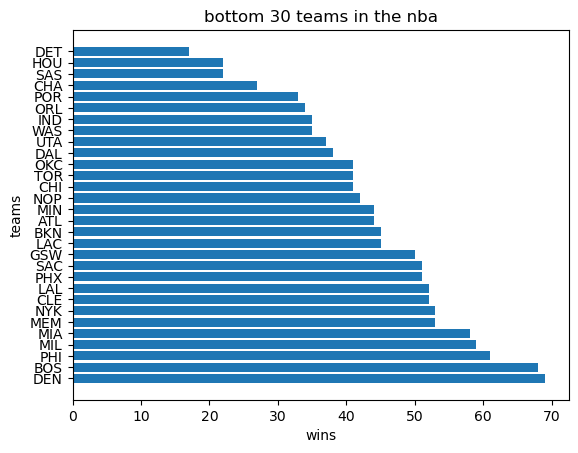

In [9]:
teamsRanking("Bottom",30)